In [36]:
from selective_bayes import *
import numpy as np
import math
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [37]:
dataset = pd.read_csv('reservations.csv')
TARGET = 'booking_status'

In [38]:
dataset = dataset.drop('Booking_ID', axis=1)
encodings = {k:v for v, k in enumerate(dataset[TARGET].unique())}
dataset[TARGET] = dataset[TARGET].map(encodings)

In [39]:
dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [40]:
train, test = train_test_split(dataset, test_size=0.1, random_state=9)
columns_to_bin =  ['lead_time', 'avg_price_per_room']
TARGET = 'booking_status'


In [41]:
train, _ = preprocess_dataset(train, TARGET, columns_to_bin=columns_to_bin, columns_to_encode=[], duplicates_drop_cols=[])
test, _ = preprocess_dataset(test, TARGET, columns_to_bin=columns_to_bin, columns_to_encode=[], duplicates_drop_cols=[])

lead_time
avg_price_per_room
lead_time
avg_price_per_room


In [42]:
nb = NB_classifier(train, TARGET)
nb_preds = []
gold_preds = []
for ind, example in test.iterrows():
    prediction = nb.classify(example)
    nb_preds.append(prediction)
    gold_preds.append(example[TARGET])
print(f'Accuracy Naive Bayes: {accuracy_score(gold_preds, nb_preds)}')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


{0: 0.00862084312260953, 1: 0.0047276960313458955}
{0: 0.00010699424294877443, 1: 4.704672735289886e-06}
{0: 0.004054877736963394, 1: 0.003771523648393819}
{0: 3.162962975224283e-09, 1: 3.599807715862803e-15}
{0: 0.0002326351286658158, 1: 0.0002326124185649841}
{0: 0.015555742601095724, 1: 0.007722135889724944}
{0: 0.0007154231588955767, 1: 8.544842731901767e-05}
{0: 0.0013373518908181166, 1: 8.564983111246003e-05}
{0: 0.0005622207322454416, 1: 0.0002603700437832738}
{0: 0.009852787880417078, 1: 0.0030477942658397165}
{0: 0.00029400268149375826, 1: 0.00010732311791158204}
{0: 0.019381869179251266, 1: 0.016253010446666275}
{0: 0.0006178371793982423, 1: 3.334225388137729e-05}
{0: 0.0005469299821339529, 1: 0.00014961812521123915}
{0: 0.0001367302725875008, 1: 2.2119688226285646e-05}
{0: 0.0002556693321921478, 1: 1.8179763304975983e-06}
{0: 0.0003014087010073384, 1: 3.997742652298899e-05}
{0: 0.0044693062818330935, 1: 0.054627214434231464}
{0: 0.007184230721445807, 1: 0.0012215368887585614

In [43]:
snb = Selective_NB_classifier(train, target_col=TARGET)

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


In [44]:
snb.calculate_mutual_information()
snb.order_by_mi()

no_of_adults
no_of_children
no_of_weekend_nights
no_of_week_nights
type_of_meal_plan
required_car_parking_space
room_type_reserved
lead_time
arrival_year
arrival_month
arrival_date
market_segment_type
repeated_guest
no_of_previous_cancellations
no_of_previous_bookings_not_canceled
avg_price_per_room
no_of_special_requests


In [45]:
snb.select_best_model()

0it [00:00, ?it/s]c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = example[-1]
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:175: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_gold = example[-1] # true label
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

{(7,): 0.4425399478680299, (7, 16): 0.4256570583428517, (7, 16, 8): 0.41907850494663823, (7, 16, 8, 12): 0.4192035297506492, (7, 16, 8, 12, 14): 0.4212193316215364, (7, 16, 8, 12, 14, 11): 0.41663313531092533, (7, 16, 8, 12, 14, 11, 9): 0.41389793083637766, (7, 16, 8, 12, 14, 11, 9, 15): 0.4134214653047277, (7, 16, 8, 12, 14, 11, 9, 15, 5): 0.41228021170809503, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13): 0.4130647238677595, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13, 0): 0.41492239207794585, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13, 0, 4): 0.41561370791658636, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13, 0, 4, 3): 0.41511754471777346, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13, 0, 4, 3, 2): 0.4145904378167292, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13, 0, 4, 3, 2, 10): 0.4132051993153691, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13, 0, 4, 3, 2, 10, 1): 0.41274070077757974, (7, 16, 8, 12, 14, 11, 9, 15, 5, 13, 0, 4, 3, 2, 10, 1, 6): 0.41292385250130975}
Best model attributes: (7, 16, 8, 12, 14, 11, 9, 15, 5)


In [46]:
preds = []
gold = []
for ind, example in test.iterrows():
        prediction = snb.classify(example)
        preds.append(prediction)
        gold.append(example[TARGET])
print(f'Accuracy Selective Naive Bayes with optimal attributes: {accuracy_score(gold, preds)}')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:248: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  example_prep[i] = example[i]


Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted cl

## Confusion Matrix for Selective Naive Bayes

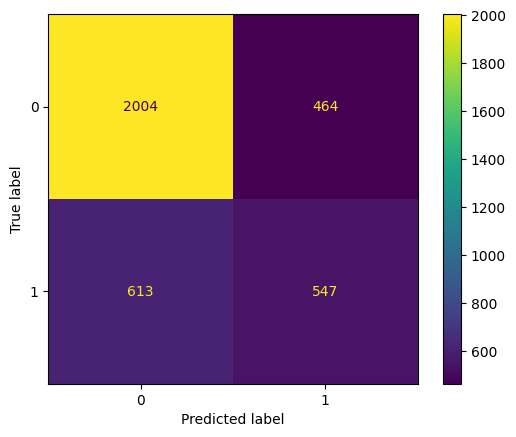

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(gold, preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## CM for Naive Bayes

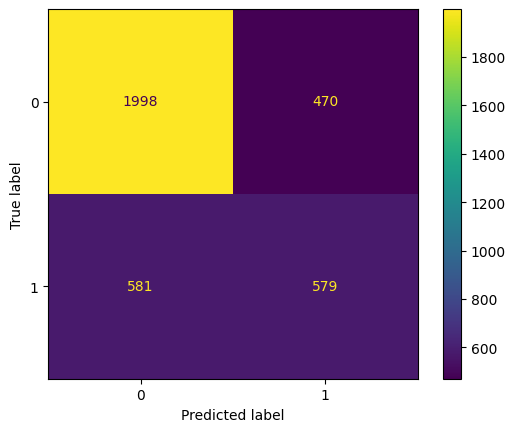

In [48]:
cm = confusion_matrix(gold_preds, nb_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## 
Extreme imbalance in the dataset may influence the predictions - trying to use balanced dataset for training